**Valence Aware Dictionary and sEntiment Reasoner - VADER**

VADER is a pre-trained sentiment analysis model, part of the NLTK. It gives a sentiment score for each word in the text and then finds the sentiment of the whole text by taking the average.

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [4]:
df = pd.read_csv('Reviews.csv').head(500)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


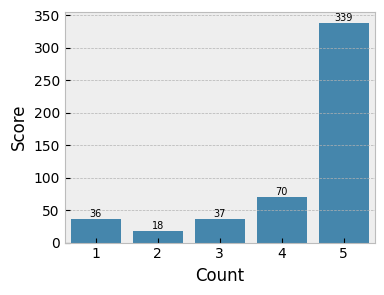

In [6]:
plt.figure(figsize=(4,3))
ax = sns.barplot(x=df['Score'].value_counts().sort_index().index, y=df['Score'].value_counts().sort_index().values)
ax.bar_label(ax.containers[0], fmt='%d', fontsize=7)
plt.xlabel('Count')
plt.ylabel('Score')
plt.show()

In [7]:
sia = SentimentIntensityAnalyzer()
d = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    d[row['Id']] = sia.polarity_scores(row['Text'])

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
data = pd.DataFrame(d).T.reset_index().rename(columns={'index':'Id'}).merge(df, how='left')
data.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


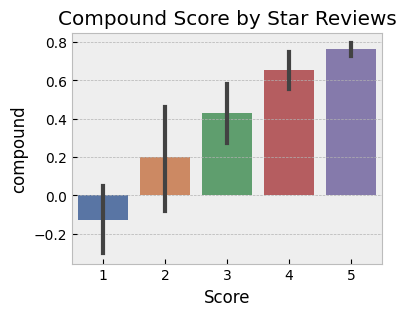

In [9]:
plt.figure(figsize=(4,3))
ax = sns.barplot(data=data, x='Score', y='compound', hue='Score', palette='deep', legend=False)
ax.set_title('Compound Score by Star Reviews')
plt.show()

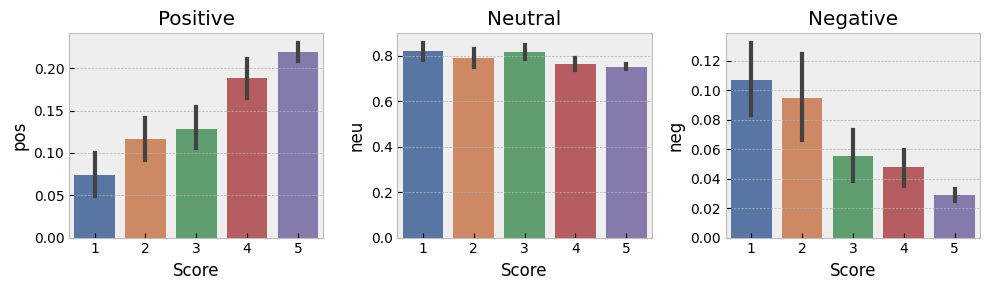

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
sns.barplot(data=data, x='Score', y='pos', ax=axes[0], hue='Score', palette='deep', legend=False)
sns.barplot(data=data, x='Score', y='neu', ax=axes[1], hue='Score', palette='deep', legend=False)
sns.barplot(data=data, x='Score', y='neg', ax=axes[2], hue='Score', palette='deep', legend=False)
axes[0].set_title('Positive')
axes[1].set_title('Neutral')
axes[2].set_title('Negative')
plt.tight_layout()
plt.show()